## Features for the Personal Transaction Data Generation
- monthly budget estimation
- average number of transactions a day
- months with highest expenses
- dependent family size
- age
- education level
- inflation rate

In [8]:
import pandas as pd
import numpy as np
import random
from operator import itemgetter
from datetime import datetime, timedelta

# Initialize variables
transaction_categories = ["food", "transport",
                          "entertainment", "shopping", "bills", "others"]
payment_methods = ["cash", "credit_card",
                   "debit_card", "e-wallet", "online_banking"]


def round_to_multiple(number, multiple):
    return multiple * round(number / multiple)


def generate_daily_transaction_counts(daily_average_count, num_days):
    daily_counts = []
    total_count = 0

    for day in range(1, num_days + 1):
        # Calculate weight for the day of the month
        # Increase transaction count by 50% towards the end of the month
        day_weight = 1 + ((day - 1) / num_days) * 0.5

        # Generate random transaction count for the day
        random_multiplier = random.uniform(
            0.8, 1.2)  # Randomness between 80% and 120%
        daily_count = int(round(daily_average_count *
                          day_weight * random_multiplier))

        # Append daily count to the array
        daily_counts.append(daily_count)

        # Update total count
        total_count += daily_count

    # Adjust the daily counts to maintain the average
    actual_daily_average = total_count / num_days
    adjustment_factor = daily_average_count / actual_daily_average

    for i in range(len(daily_counts)):
        daily_counts[i] = int(round(daily_counts[i] * adjustment_factor))

    return daily_counts


def generate_transactions_data(year, personal_data):
    inflation_rate, dependent_family_size, age, months_with_higher_spending, number_of_expenses_a_month, most_frequent_expense_categories, estimated_monthly_expenses = itemgetter(
        "inflation_rate",
        "dependent_family_size",
        "age",
        "months_with_higher_spending",
        "number_of_expenses_a_month",
        "most_frequent_expense_categories",
        "estimated_monthly_expenses")(personal_data)

    # generate category list with more frequent categories
    generated_categories = transaction_categories + \
        most_frequent_expense_categories + most_frequent_expense_categories

    # Initialize empty list to hold the records
    records = []

    # Generate records based on number_of_expenses_a_month
    for month in range(1, 13):  # Loop through each month

        is_higher_spending_month = month in months_with_higher_spending
        monthly_transactions_count = random.randint(
            number_of_expenses_a_month - 10, number_of_expenses_a_month + 10)

        # generate an average amount for the month based on the estimated monthly expenses
        monthly_average_amount = random.randint(
            int(estimated_monthly_expenses * 0.8), int(estimated_monthly_expenses * 1.2))

        if len(months_with_higher_spending) > 0:
            if is_higher_spending_month:
                monthly_transactions_count += 10
                monthly_average_amount *= random.uniform(1.1, 1.2)
            else:
                monthly_transactions_count -= 10
                monthly_average_amount *= random.uniform(0.8, 0.9)

        num_days = 28
        if month in [1, 3, 5, 7, 8, 10, 12]:
            num_days = 31

        daily_average_count = monthly_transactions_count / num_days
        daily_transaction_counts = generate_daily_transaction_counts(
            daily_average_count, num_days)

        daily_average_amount = monthly_average_amount / num_days
        monthly_records = []

        for day in range(1, num_days + 1):  # Loop through each day
            daily_count = daily_transaction_counts[day - 1]
            average_transaction_amount = daily_average_amount / daily_count

            for _ in range(daily_count):
                # Generate random date
                date = datetime(year=year, month=month, day=day)

                amount = random.randint(
                    int(average_transaction_amount * 0.5), int(average_transaction_amount))

                # Choose category based on most_frequent_expense_categories
                category = random.choice(generated_categories)
                is_most_frequent_category = category in most_frequent_expense_categories

                # Generate base amount
                if is_most_frequent_category:
                    amount = random.randint(
                        int(amount * 0.7), int(amount))
                else:
                    amount = random.randint(
                        int(amount * 0.9), int(amount * 1.1))

                if is_higher_spending_month:
                    amount *= random.uniform(1, 1.06)

                amount *= (1 + (inflation_rate * 0.01))  # Apply inflation
                # Apply family size
                amount *= (1 + (dependent_family_size * 0.02))
                amount *= (1 + (age * 0.02))  # Apply age

                # Generate more realistic amounts, rounded to the nearest 10 or 100
                if amount < 100:
                    amount = round_to_multiple(
                        amount, 5)  # Round to nearest 10
                else:
                    amount = round(amount, -1)  # Round to nearest 100

                payment_method = random.choice(payment_methods)
                credit_or_debit = "debit"  # Since there is no "income" category

                monthly_records.append(
                    [date, category, amount, credit_or_debit, payment_method, inflation_rate, dependent_family_size, age, months_with_higher_spending, number_of_expenses_a_month, most_frequent_expense_categories, estimated_monthly_expenses])

        records = records + monthly_records

    return pd.DataFrame(records, columns=[
        'Date', 'Transaction Category', 'Amount', 'Credit/Debit', 'Payment Method', 'Inflation Rate', 'Dependent Family Size', 'Age', 'Months with Higher Spending', 'Number of Expenses a Month', 'Most Frequent Expense Categories', 'Estimated Monthly Expenses'])

In [9]:
personal_data_list = [
    {
        "key": 'personal_1',
        "inflation_rate": 0.7,
        "dependent_family_size": 3,
        "age": 25,
        "months_with_higher_spending": [1, 3, 12],
        "number_of_expenses_a_month": 100,
        "most_frequent_expense_categories": ['transport', 'food'],
        "estimated_monthly_expenses": 200000
    },
    {
        "key": 'personal_2',
        "inflation_rate": 0.7,
        "dependent_family_size": 3,
        "age": 25,
        "months_with_higher_spending": [1, 3, 12],
        "number_of_expenses_a_month": 100,
        "most_frequent_expense_categories": ['transport', 'food'],
        "estimated_monthly_expenses": 200000
    },
    {
        "key": 'personal_3',
        "inflation_rate": 0.7,
        "dependent_family_size": 3,
        "age": 25,
        "months_with_higher_spending": [1, 3, 12],
        "number_of_expenses_a_month": 100,
        "most_frequent_expense_categories": ['transport', 'food'],
        "estimated_monthly_expenses": 200000 
    }
]

current_year = datetime.now().year
years = list(np.arange(current_year - 10, current_year))
print(years)

def get_total_spending_of_the_month_until_that_day(dataset, month, day):
    return dataset.loc[(dataset['Year-Month'] == month) & (dataset['Day'] <= day)]['Amount'].sum()

df = pd.DataFrame()

for index, personal_data in enumerate(personal_data_list):
    df_person_data = pd.DataFrame()
    for year in years:
        df_generated = generate_transactions_data(year, personal_data)
        df_person_data = pd.concat([df_person_data, df_generated])

    df_person_data.sort_values(by=['Date'], inplace=True)
    df_person_data = df_person_data.reset_index(drop=True)

    df_person_data['Day'] = df_person_data['Date'].dt.day
    df_person_data['Month'] = df_person_data['Date'].dt.month
    df_person_data['Year'] = df_person_data['Date'].dt.year

    monthly_budget = df_person_data.groupby(['Year', 'Month'])['Amount'].sum().reset_index()
    monthly_budget['Year-Month'] = monthly_budget['Year'].astype(
        str) + '-' + monthly_budget['Month'].astype(str).str.zfill(2)
    monthly_budget.drop('Year', axis=1, inplace=True)
    print(monthly_budget.head())

    monthly_transaction_counts = df_person_data.groupby(['Year', 'Month'])['Amount'].count().reset_index()
    monthly_transaction_counts['Year-Month'] = monthly_transaction_counts['Year'].astype(
        str) + '-' + monthly_transaction_counts['Month'].astype(str).str.zfill(2)

    df_person_data['Year-Month'] = df_person_data['Year'].astype(str) + '-' + df_person_data['Month'].astype(str).str.zfill(2)
    df_person_data['Budget'] = df_person_data['Year-Month'].map(monthly_budget.set_index('Year-Month')['Amount'])
    df_person_data['Number of Expenses a Month'] = df_person_data['Year-Month'].map(monthly_transaction_counts.set_index('Year-Month')['Amount'])
    
    df_person_data['Cumulative Monthly Spending'] = df_person_data.apply(lambda x: get_total_spending_of_the_month_until_that_day(df_person_data, x['Year-Month'], x['Day']), axis=1)
    df_person_data['Last Month Budget'] = df_person_data['Year-Month'].map(monthly_budget.set_index('Year-Month')['Amount'].shift(1))
    # use this month's budget if last month's budget is not available
    df_person_data['Last Month Budget'] = df_person_data['Last Month Budget'].fillna(df_person_data['Budget'])
    df_person_data['Average Monthly Budget'] = monthly_budget['Amount'].mean().round(2)

    df = pd.concat([df, df_person_data])

    # save to csv
    df_person_data.to_csv(f'../data/generated/generated_data_{index + 1}.csv', index=False)

df.sort_values(by=['Date'], inplace=True)
df = df.reset_index(drop=True)
# Show DataFrame
print(df.info())
df.head()

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
   Month    Amount Year-Month
0      1  272610.0    2013-01
1      2  158390.0    2013-02
2      3  223550.0    2013-03
3      4  159310.0    2013-04
4      5  183650.0    2013-05
   Month    Amount Year-Month
0      1  280500.0    2013-01
1      2  201840.0    2013-02
2      3  324790.0    2013-03
3      4  230260.0    2013-04
4      5  216970.0    2013-05
   Month    Amount Year-Month
0      1  216250.0    2013-01
1      2  145230.0    2013-02
2      3  288180.0    2013-03
3      4  181040.0    2013-04
4      5  192810.0    2013-05
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404 entries, 0 to 32403
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              32404 non-null  datetime64[ns]
 1   Transaction Category              32404 non-null  object        
 2   Amoun

,Date,Transaction Category,Amount,Credit/Debit,Payment Method,Inflation Rate,Dependent Family Size,Age,Months with Higher Spending,Number of Expenses a Month,Most Frequent Expense Categories,Estimated Monthly Expenses,Day,Month,Year,Year-Month,Budget,Cumulative Monthly Spending,Last Month Budget,Average Monthly Budget
0,2013-01-01,others,4200.0,debit,cash,0.7,3,25,"[1, 3, 12]",119,"[transport, food]",200000,1,1,2013,2013-01,272610.0,8720.0,272610.0,205843.75
1,2013-01-01,others,1790.0,debit,online_banking,0.7,3,25,"[1, 3, 12]",119,"[transport, food]",200000,1,1,2013,2013-01,216250.0,5380.0,216250.0,203210.08
2,2013-01-01,food,4120.0,debit,e-wallet,0.7,3,25,"[1, 3, 12]",101,"[transport, food]",200000,1,1,2013,2013-01,280500.0,8510.0,280500.0,202725.33
3,2013-01-01,transport,4390.0,debit,debit_card,0.7,3,25,"[1, 3, 12]",101,"[transport, food]",200000,1,1,2013,2013-01,280500.0,8510.0,280500.0,202725.33
4,2013-01-01,transport,1370.0,debit,credit_card,0.7,3,25,"[1, 3, 12]",119,"[transport, food]",200000,1,1,2013,2013-01,216250.0,5380.0,216250.0,203210.08


In [10]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [11]:
data_summary = df.groupby([ 'Year', 'Month']).agg(
    {'Amount': ['sum', 'mean', 'min', 'max', 'count']})
data_summary

Amount                                   
                 sum         mean     min     max count
Year Month                                             
2013 1      769360.0  2269.498525   900.0  6310.0   339
     2      505460.0  1907.396226   680.0  4590.0   265
     3      836520.0  2497.074627   830.0  5430.0   335
     4      570610.0  2357.892562   950.0  5610.0   242
     5      593430.0  2214.291045   950.0  4780.0   268
...              ...          ...     ...     ...   ...
2022 8      501030.0  2105.168067   690.0  4090.0   238
     9      581980.0  2346.693548   950.0  5500.0   248
     10     588080.0  2534.827586   760.0  4870.0   232
     11     564700.0  2314.344262   960.0  5470.0   244
     12     717220.0  2306.173633  1020.0  6030.0   311

[120 rows x 5 columns]

In [12]:

monthly_budget = df.groupby(['Year', 'Month'])['Amount'].sum().reset_index()
monthly_budget['Year-Month'] = monthly_budget['Year'].astype(
    str) + '-' + monthly_budget['Month'].astype(str).str.zfill(2)
monthly_budget.drop('Year', axis=1, inplace=True)
print(monthly_budget.head())

df['Year-Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)
df['Budget'] = df['Year-Month'].map(monthly_budget.set_index('Year-Month')['Amount'])


   Month    Amount Year-Month
0      1  769360.0    2013-01
1      2  505460.0    2013-02
2      3  836520.0    2013-03
3      4  570610.0    2013-04
4      5  593430.0    2013-05


In [13]:
df

,Date,Transaction Category,Amount,Credit/Debit,Payment Method,Inflation Rate,Dependent Family Size,Age,Months with Higher Spending,Number of Expenses a Month,Most Frequent Expense Categories,Estimated Monthly Expenses,Day,Month,Year,Year-Month,Budget,Cumulative Monthly Spending,Last Month Budget,Average Monthly Budget
0,2013-01-01,others,4200.0,debit,cash,0.7,3,25,"[1, 3, 12]",119,"[transport, food]",200000,1,1,2013,2013-01,769360.0,8720.0,272610.0,205843.75
1,2013-01-01,others,1790.0,debit,online_banking,0.7,3,25,"[1, 3, 12]",119,"[transport, food]",200000,1,1,2013,2013-01,769360.0,5380.0,216250.0,203210.08
2,2013-01-01,food,4120.0,debit,e-wallet,0.7,3,25,"[1, 3, 12]",101,"[transport, food]",200000,1,1,2013,2013-01,769360.0,8510.0,280500.0,202725.33
3,2013-01-01,transport,4390.0,debit,debit_card,0.7,3,25,"[1, 3, 12]",101,"[transport, food]",200000,1,1,2013,2013-01,769360.0,8510.0,280500.0,202725.33
4,2013-01-01,transport,1370.0,debit,credit_card,0.7,3,25,"[1, 3, 12]",119,"[transport, food]",200000,1,1,2013,2013-01,769360.0,5380.0,216250.0,203210.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399,2022-12-31,transport,2080.0,debit,e-wallet,0.7,3,25,"[1, 3, 12]",116,"[transport, food]",200000,31,12,2022,2022-12,717220.0,245330.0,185370.0,205843.75
32400,2022-12-31,transport,2550.0,debit,cash,0.7,3,25,"[1, 3, 12]",116,"[transport, food]",200000,31,12,2022,2022-12,717220.0,245330.0,185370.0,205843.75
32401,2022-12-31,others,2690.0,debit,debit_card,0.7,3,25,"[1, 3, 12]",116,"[transport, food]",200000,31,12,2022,2022-12,717220.0,245330.0,185370.0,205843.75
32402,2022-12-31,food,1110.0,debit,cash,0.7,3,25,"[1, 3, 12]",94,"[transport, food]",200000,31,12,2022,2022-12,717220.0,221010.0,182510.0,202725.33


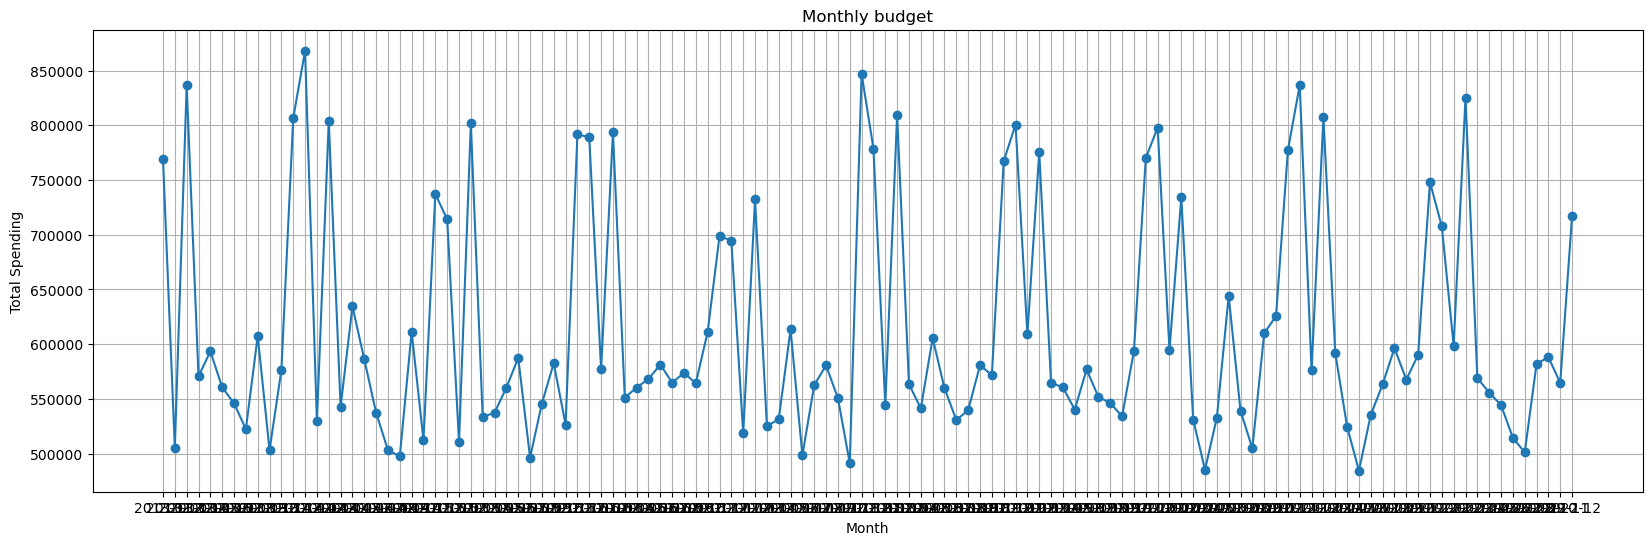

In [14]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(20, 6))
plt.plot(monthly_budget['Year-Month'],
         monthly_budget['Amount'], marker='o', linestyle='-')

# Customize the plot
plt.title('Monthly budget')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.grid(True)

# Show the plot
plt.show()